In [1]:
#begin

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import os

In [3]:
import yfinance as yf
ticker = 'GOLD'  # NASDAQ Composite Index

# Download historical data
data = yf.download(ticker, start='2000-01-07', end='2021-01-01')

# Save to CSV
data.to_csv('C:/Users/nimam/StonksMachine/Data/nasdaq_prices.csv')

print("Data downloaded and saved to 'C:/Users/nimam/StonksMachine/Data/nasdaq_prices.csv'")
print(data.head(5))  # first 5 rows

#last few rows
print(data.tail(5))  # Prints the last 5 rows by default

print(data.columns)


[*********************100%%**********************]  1 of 1 completed

Data downloaded and saved to 'C:/Users/nimam/StonksMachine/Data/nasdaq_prices.csv'
               Open     High      Low    Close  Adj Close   Volume
Date                                                              
2000-01-07  17.8125  17.8750  17.2500  17.3125  12.136871  1199900
2000-01-10  17.4375  17.4375  17.2500  17.3125  12.136871   958200
2000-01-11  17.4375  17.8125  17.2500  17.6250  12.355947  1914500
2000-01-12  17.3750  17.5625  17.2500  17.3125  12.136871   936200
2000-01-13  17.3125  17.6250  17.1875  17.1875  12.049243  1147800
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-12-24  22.799999  23.040001  22.730000  22.900000  20.494329   4920100
2020-12-28  23.520000  23.540001  22.799999  22.840000  20.440638  15946700
2020-12-29  22.959999  23.280001  22.750000  22.910000  20.503283  14663900
2020-12-30  22.969999  23.280001  22.850000  23.240000  20.798615  1

In [4]:
# Download historical data for Y input
y_data = yf.download(ticker, start='2021-01-04', end='2024-01-04')

# Save to CSV
y_data.to_csv('C:/Users/nimam/StonksMachine/Data/Y_nasdaq_prices.csv')

print("Data downloaded and saved to 'C:/Users/nimam/StonksMachine/Data/Y_nasdaq_prices.csv'")
print(y_data.head(5))  # first 5 rows

#last few rows
print(y_data.tail(5))  # Prints the last 5 rows by default

print(y_data.columns)

[*********************100%%**********************]  1 of 1 completed

Data downloaded and saved to 'C:/Users/nimam/StonksMachine/Data/Y_nasdaq_prices.csv'
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2021-01-04  23.850000  24.799999  23.620001  24.620001  22.033648  41044700
2021-01-05  24.930000  24.950001  24.090000  24.280001  21.729366  30884800
2021-01-06  24.070000  24.570000  23.900000  24.500000  21.926250  30367800
2021-01-07  24.540001  24.860001  24.250000  24.770000  22.167889  18996000
2021-01-08  24.219999  24.370001  23.580000  23.969999  21.451929  25824800
                 Open       High    Low      Close  Adj Close    Volume
Date                                                                   
2023-12-27  18.230000  18.540001  18.23  18.469999  18.235504  12681000
2023-12-28  18.360001  18.420000  18.08  18.090000  17.860329  12089400
2023-12-29  18.020000  18.100000  17.83  18.090000  17.860329  11945400
2024-01-02  18.020000  

In [5]:
# Display info about the DataFrame
model_data = pd.read_csv('C:/Users/nimam/StonksMachine/Data/nasdaq_prices.csv', index_col=None)
print(model_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5280 entries, 0 to 5279
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5280 non-null   object 
 1   Open       5280 non-null   float64
 2   High       5280 non-null   float64
 3   Low        5280 non-null   float64
 4   Close      5280 non-null   float64
 5   Adj Close  5280 non-null   float64
 6   Volume     5280 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 288.9+ KB
None


In [6]:
y_model_data = pd.read_csv('C:/Users/nimam/StonksMachine/Data/Y_nasdaq_prices.csv', index_col=None)
print(y_model_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       755 non-null    object 
 1   Open       755 non-null    float64
 2   High       755 non-null    float64
 3   Low        755 non-null    float64
 4   Close      755 non-null    float64
 5   Adj Close  755 non-null    float64
 6   Volume     755 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 41.4+ KB
None


In [7]:
model_data['Date'] = pd.to_datetime(model_data['Date'])
model_data.set_index('Date', inplace=True)

print(model_data.head())



               Open     High      Low    Close  Adj Close   Volume
Date                                                              
2000-01-07  17.8125  17.8750  17.2500  17.3125  12.136871  1199900
2000-01-10  17.4375  17.4375  17.2500  17.3125  12.136871   958200
2000-01-11  17.4375  17.8125  17.2500  17.6250  12.355947  1914500
2000-01-12  17.3750  17.5625  17.2500  17.3125  12.136871   936200
2000-01-13  17.3125  17.6250  17.1875  17.1875  12.049243  1147800


In [8]:
y_model_data['Date'] = pd.to_datetime(y_model_data['Date'])
y_model_data.set_index('Date', inplace=True)

print(y_model_data.head())

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2021-01-04  23.850000  24.799999  23.620001  24.620001  22.033648  41044700
2021-01-05  24.930000  24.950001  24.090000  24.280001  21.729366  30884800
2021-01-06  24.070000  24.570000  23.900000  24.500000  21.926250  30367800
2021-01-07  24.540001  24.860001  24.250000  24.770000  22.167889  18996000
2021-01-08  24.219999  24.370001  23.580000  23.969999  21.451929  25824800


In [9]:
all_dates = pd.date_range(start=model_data.index.min(), end=model_data.index.max(), freq='D') 

model_data = model_data.reindex(all_dates)

model_data.ffill(inplace=True)

print(model_data.isna().sum())
print(model_data.head(10))

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
               Open     High      Low    Close  Adj Close     Volume
2000-01-07  17.8125  17.8750  17.2500  17.3125  12.136871  1199900.0
2000-01-08  17.8125  17.8750  17.2500  17.3125  12.136871  1199900.0
2000-01-09  17.8125  17.8750  17.2500  17.3125  12.136871  1199900.0
2000-01-10  17.4375  17.4375  17.2500  17.3125  12.136871   958200.0
2000-01-11  17.4375  17.8125  17.2500  17.6250  12.355947  1914500.0
2000-01-12  17.3750  17.5625  17.2500  17.3125  12.136871   936200.0
2000-01-13  17.3125  17.6250  17.1875  17.1875  12.049243  1147800.0
2000-01-14  17.1250  17.1875  16.9375  16.9375  11.873981  1610400.0
2000-01-15  17.1250  17.1875  16.9375  16.9375  11.873981  1610400.0
2000-01-16  17.1250  17.1875  16.9375  16.9375  11.873981  1610400.0


In [10]:
model_data = model_data.reset_index()
model_data.rename(columns={'index': 'Date'}, inplace=True)
#model_data.reset_index(drop=True, inplace=True)
print(model_data.head(10))

        Date     Open     High      Low    Close  Adj Close     Volume
0 2000-01-07  17.8125  17.8750  17.2500  17.3125  12.136871  1199900.0
1 2000-01-08  17.8125  17.8750  17.2500  17.3125  12.136871  1199900.0
2 2000-01-09  17.8125  17.8750  17.2500  17.3125  12.136871  1199900.0
3 2000-01-10  17.4375  17.4375  17.2500  17.3125  12.136871   958200.0
4 2000-01-11  17.4375  17.8125  17.2500  17.6250  12.355947  1914500.0
5 2000-01-12  17.3750  17.5625  17.2500  17.3125  12.136871   936200.0
6 2000-01-13  17.3125  17.6250  17.1875  17.1875  12.049243  1147800.0
7 2000-01-14  17.1250  17.1875  16.9375  16.9375  11.873981  1610400.0
8 2000-01-15  17.1250  17.1875  16.9375  16.9375  11.873981  1610400.0
9 2000-01-16  17.1250  17.1875  16.9375  16.9375  11.873981  1610400.0


In [11]:
#convert date column to year, month, and day
model_data['year'] = model_data['Date'].dt.year.astype('float64')
model_data['month'] = model_data['Date'].dt.month.astype('float64')
model_data['day'] = model_data['Date'].dt.day.astype('float64')
model_data['day_of_week'] = model_data['Date'].dt.dayofweek
model_data = model_data.drop(columns=['Date'])

print(model_data.head(10))
print(model_data.tail(10))

      Open     High      Low    Close  Adj Close     Volume    year  month  \
0  17.8125  17.8750  17.2500  17.3125  12.136871  1199900.0  2000.0    1.0   
1  17.8125  17.8750  17.2500  17.3125  12.136871  1199900.0  2000.0    1.0   
2  17.8125  17.8750  17.2500  17.3125  12.136871  1199900.0  2000.0    1.0   
3  17.4375  17.4375  17.2500  17.3125  12.136871   958200.0  2000.0    1.0   
4  17.4375  17.8125  17.2500  17.6250  12.355947  1914500.0  2000.0    1.0   
5  17.3750  17.5625  17.2500  17.3125  12.136871   936200.0  2000.0    1.0   
6  17.3125  17.6250  17.1875  17.1875  12.049243  1147800.0  2000.0    1.0   
7  17.1250  17.1875  16.9375  16.9375  11.873981  1610400.0  2000.0    1.0   
8  17.1250  17.1875  16.9375  16.9375  11.873981  1610400.0  2000.0    1.0   
9  17.1250  17.1875  16.9375  16.9375  11.873981  1610400.0  2000.0    1.0   

    day  day_of_week  
0   7.0            4  
1   8.0            5  
2   9.0            6  
3  10.0            0  
4  11.0            1  
5  

In [12]:
print(y_model_data.isna().sum())
print(y_model_data.head(10))
y_all_dates = pd.date_range(start=y_model_data.index.min(), end=y_model_data.index.max(), freq='D') 

y_model_data = y_model_data.reindex(y_all_dates)

y_model_data.ffill(inplace=True)

print(y_model_data.isna().sum())
print(y_model_data.head(10))

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2021-01-04  23.850000  24.799999  23.620001  24.620001  22.033648  41044700
2021-01-05  24.930000  24.950001  24.090000  24.280001  21.729366  30884800
2021-01-06  24.070000  24.570000  23.900000  24.500000  21.926250  30367800
2021-01-07  24.540001  24.860001  24.250000  24.770000  22.167889  18996000
2021-01-08  24.219999  24.370001  23.580000  23.969999  21.451929  25824800
2021-01-11  23.530001  23.780001  23.440001  23.520000  21.049200  21563700
2021-01-12  23.590000  23.670000  23.200001  23.540001  21.067102  22550300
2021-01-13  23.600000  23.900000  23.490000  23.600000  21.120798  17298500
2021-01-14  23.570000  23.910000  23.540001  23.680000  21.192392  15120900
2021-01-15  23.580000  23.730000  23.110001  23.139999  20.70

In [13]:
y_model_data = y_model_data.reset_index()
y_model_data.rename(columns={'index': 'Date'}, inplace=True)
#model_data.reset_index(drop=True, inplace=True)
print(y_model_data.head(10))

        Date       Open       High        Low      Close  Adj Close  \
0 2021-01-04  23.850000  24.799999  23.620001  24.620001  22.033648   
1 2021-01-05  24.930000  24.950001  24.090000  24.280001  21.729366   
2 2021-01-06  24.070000  24.570000  23.900000  24.500000  21.926250   
3 2021-01-07  24.540001  24.860001  24.250000  24.770000  22.167889   
4 2021-01-08  24.219999  24.370001  23.580000  23.969999  21.451929   
5 2021-01-09  24.219999  24.370001  23.580000  23.969999  21.451929   
6 2021-01-10  24.219999  24.370001  23.580000  23.969999  21.451929   
7 2021-01-11  23.530001  23.780001  23.440001  23.520000  21.049200   
8 2021-01-12  23.590000  23.670000  23.200001  23.540001  21.067102   
9 2021-01-13  23.600000  23.900000  23.490000  23.600000  21.120798   

       Volume  
0  41044700.0  
1  30884800.0  
2  30367800.0  
3  18996000.0  
4  25824800.0  
5  25824800.0  
6  25824800.0  
7  21563700.0  
8  22550300.0  
9  17298500.0  


In [14]:
#convert date column to year, month, and day
y_model_data['year'] = y_model_data['Date'].dt.year.astype('float64')
y_model_data['month'] = y_model_data['Date'].dt.month.astype('float64')
y_model_data['day'] = y_model_data['Date'].dt.day.astype('float64')
y_model_data['day_of_week'] = y_model_data['Date'].dt.dayofweek
y_model_data = y_model_data.drop(columns=['Date'])
print(y_model_data.head(10))

        Open       High        Low      Close  Adj Close      Volume    year  \
0  23.850000  24.799999  23.620001  24.620001  22.033648  41044700.0  2021.0   
1  24.930000  24.950001  24.090000  24.280001  21.729366  30884800.0  2021.0   
2  24.070000  24.570000  23.900000  24.500000  21.926250  30367800.0  2021.0   
3  24.540001  24.860001  24.250000  24.770000  22.167889  18996000.0  2021.0   
4  24.219999  24.370001  23.580000  23.969999  21.451929  25824800.0  2021.0   
5  24.219999  24.370001  23.580000  23.969999  21.451929  25824800.0  2021.0   
6  24.219999  24.370001  23.580000  23.969999  21.451929  25824800.0  2021.0   
7  23.530001  23.780001  23.440001  23.520000  21.049200  21563700.0  2021.0   
8  23.590000  23.670000  23.200001  23.540001  21.067102  22550300.0  2021.0   
9  23.600000  23.900000  23.490000  23.600000  21.120798  17298500.0  2021.0   

   month   day  day_of_week  
0    1.0   4.0            0  
1    1.0   5.0            1  
2    1.0   6.0            2  

In [15]:
# only saling the features and not dates 
features = ['Open', 'High', 'Low', 'Close']
non_features = ['year', 'month', 'day', 'day_of_week']
scalers = {col: MinMaxScaler() for col in features}
scaled_data = pd.DataFrame(index=model_data.index)
for col in features:
    scaled_data[col] = scalers[col].fit_transform(model_data[[col]])


scaled_data = pd.concat([scaled_data, model_data[non_features]], axis=1)
print(scaled_data)

          Open      High       Low     Close    year  month   day  day_of_week
0     0.237212  0.234212  0.230582  0.228869  2000.0    1.0   7.0            4
1     0.237212  0.234212  0.230582  0.228869  2000.0    1.0   8.0            5
2     0.237212  0.234212  0.230582  0.228869  2000.0    1.0   9.0            6
3     0.229630  0.225412  0.230582  0.228869  2000.0    1.0  10.0            0
4     0.229630  0.232955  0.230582  0.235158  2000.0    1.0  11.0            1
...        ...       ...       ...       ...     ...    ...   ...          ...
7660  0.338051  0.338093  0.342009  0.341316  2020.0   12.0  27.0            6
7661  0.352608  0.348150  0.343432  0.340109  2020.0   12.0  28.0            0
7662  0.341286  0.342920  0.342416  0.341517  2020.0   12.0  29.0            1
7663  0.341488  0.342920  0.344449  0.348159  2020.0   12.0  30.0            2
7664  0.347149  0.342719  0.341399  0.338901  2020.0   12.0  31.0            3

[7665 rows x 8 columns]


In [16]:
# only saling the features and not dates again lol
y_scaled_data = pd.DataFrame(index=y_model_data.index)
for col in features:
    y_scaled_data[col] = scalers[col].fit_transform(y_model_data[[col]])


y_scaled_data = pd.concat([y_scaled_data, y_model_data[non_features]], axis=1)
print(y_scaled_data)

          Open      High       Low     Close    year  month   day  day_of_week
0     0.843724  0.892646  0.854267  0.923077  2021.0    1.0   4.0            0
1     0.933500  0.905326  0.892109  0.895833  2021.0    1.0   5.0            1
2     0.862012  0.873204  0.876812  0.913462  2021.0    1.0   6.0            2
3     0.901081  0.897718  0.904992  0.935096  2021.0    1.0   7.0            3
4     0.874480  0.856298  0.851047  0.870994  2021.0    1.0   8.0            4
...        ...       ...       ...       ...     ...    ...   ...          ...
1090  0.359102  0.326289  0.388084  0.399840  2023.0   12.0  30.0            5
1091  0.359102  0.326289  0.388084  0.399840  2023.0   12.0  31.0            6
1092  0.359102  0.326289  0.388084  0.399840  2024.0    1.0   1.0            0
1093  0.359102  0.337278  0.387279  0.383013  2024.0    1.0   2.0            1
1094  0.312552  0.302620  0.326892  0.338942  2024.0    1.0   3.0            2

[1095 rows x 8 columns]


In [17]:
X_train = scaled_data
X_train_length = len(X_train)
X_test = y_scaled_data
X_test_length = len(X_test)
X_test_length


1095

In [18]:
lookBackWeeks = 7
X_train_df = pd.DataFrame(columns = ['y', "Seven Weeks"])
X_test_df = pd.DataFrame(columns = ['y', "Seven Weeks"])

for i in range (7 * lookBackWeeks, X_train_length):
    Seven_Weeks = []
    if i % 500 == 0:
        print(i)
    for j in range (i-7, i-50, -7):
        row = X_train.iloc[j][features].to_list()
        Seven_Weeks += row

    current_day = X_train.iloc[i][features].to_list()

    new_row = pd.DataFrame({
        'y': [current_day],
        'Seven Weeks': [Seven_Weeks]
    })

    X_train_df = pd.concat([X_train_df, new_row], ignore_index=True)
X_train_df

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500


,y,Seven Weeks
0,"[0.20941164311757016, 0.2115848717525287, 0.21...","[0.23089364834793186, 0.23672565979151955, 0.2..."
1,"[0.20941164311757016, 0.2115848717525287, 0.21...","[0.23089364834793186, 0.23672565979151955, 0.2..."
2,"[0.20941164311757016, 0.2115848717525287, 0.21...","[0.23089364834793186, 0.23672565979151955, 0.2..."
3,"[0.2157298799500295, 0.2140989505564278, 0.214...","[0.23089364834793186, 0.23672565979151955, 0.2..."
4,"[0.21320258521704577, 0.2140989505564278, 0.21...","[0.23468459044740747, 0.2455249356051663, 0.23..."
...,...,...
7611,"[0.33805092960105915, 0.3380933355783936, 0.34...","[0.3560452943230542, 0.35116653768630923, 0.35..."
7612,"[0.35260817194365807, 0.34814965079398996, 0.3...","[0.34714920606518346, 0.34553498735532795, 0.3..."
7613,"[0.3412858637742017, 0.34292036227846406, 0.34...","[0.342094616599216, 0.3382944281243232, 0.3324..."
7614,"[0.34148805198045523, 0.34292036227846406, 0.3...","[0.33441165757886665, 0.33789220467066594, 0.3..."


In [19]:
for i in range (7 * lookBackWeeks, X_test_length):
    Seven_Weeks = []
    if i % 500 == 0:
        print(i)
    for j in range (i-7, i-50, -7):
        row = X_test.iloc[j][features].to_list()
        Seven_Weeks += row

    current_day = X_test.iloc[i][features].to_list()

    new_row = pd.DataFrame({
        'y': [current_day],
        'Seven Weeks': [Seven_Weeks]
    })

    X_test_df = pd.concat([X_test_df, new_row], ignore_index=True)
X_test_df

500
1000


,y,Seven Weeks
0,"[0.523690800546583, 0.5376162849846515, 0.5515...","[0.6957606044345142, 0.6804734739074543, 0.700..."
1,"[0.5669161097158326, 0.5350803013127168, 0.545...","[0.6891105690661181, 0.6652578943354643, 0.695..."
2,"[0.5211969778274279, 0.5054944700593822, 0.541...","[0.632585189160076, 0.597633114152156, 0.61111..."
3,"[0.5112220040495088, 0.503803975507902, 0.5112...","[0.5960100739085719, 0.5705832665707564, 0.580..."
4,"[0.45968411103242657, 0.4268809109871181, 0.45...","[0.5536160389790401, 0.5232460333033069, 0.537..."
...,...,...
1041,"[0.359102306266766, 0.3262891492177047, 0.3880...","[0.38237735078147783, 0.3643279369178696, 0.41..."
1042,"[0.359102306266766, 0.3262891492177047, 0.3880...","[0.38237735078147783, 0.3643279369178696, 0.41..."
1043,"[0.359102306266766, 0.3262891492177047, 0.3880...","[0.38237735078147783, 0.3643279369178696, 0.41..."
1044,"[0.359102306266766, 0.33727808933646997, 0.387...","[0.3832086250211959, 0.3448858791224647, 0.407..."


In [20]:
X_train_df.iloc[0]

y              [0.20941164311757016, 0.2115848717525287, 0.21...
Seven Weeks    [0.23089364834793186, 0.23672565979151955, 0.2...
Name: 0, dtype: object

In [21]:
X_test_df.iloc[0]

y              [0.523690800546583, 0.5376162849846515, 0.5515...
Seven Weeks    [0.6957606044345142, 0.6804734739074543, 0.700...
Name: 0, dtype: object

In [22]:
# Split the 'y' column into separate columns
split_df = pd.DataFrame(X_train_df['y'].tolist(), index=X_train_df.index)

# Optionally rename the new columns
split_df.columns = features

# Join the new columns back to the original DataFrame (excluding the old 'y' column)
y_train = X_train_df.drop(columns=['y', "Seven Weeks"]).join(split_df)

(y_train)

,Open,High,Low,Close
0,0.209412,0.211585,0.210248,0.216291
1,0.209412,0.211585,0.210248,0.216291
2,0.209412,0.211585,0.210248,0.216291
3,0.215730,0.214099,0.214061,0.211260
4,0.213203,0.214099,0.211519,0.208744
...,...,...,...,...
7611,0.338051,0.338093,0.342009,0.341316
7612,0.352608,0.348150,0.343432,0.340109
7613,0.341286,0.342920,0.342416,0.341517
7614,0.341488,0.342920,0.344449,0.348159


In [23]:
# Split the 'y' column into separate columns
split_df_seven = pd.DataFrame(X_train_df["Seven Weeks"].tolist(), index=X_train_df.index)

# Optionally rename the new columns
features2 = []
for i in range(7):
    features2.append(f"Open{ i}")
    features2.append(f"High{ i}") 
    features2.append(f"Low{ i}") 
    features2.append(f"Close{ i}")
    
split_df_seven.columns = features2

# Join the new columns back to the original DataFrame (excluding the old 'y' column)
X_train = X_train_df.drop(columns=['y', "Seven Weeks"]).join(split_df_seven)

print(X_train)

         Open0     High0      Low0    Close0     Open1     High1      Low1  \
0     0.230894  0.236726  0.234394  0.241447  0.246057  0.243011  0.239477   
1     0.230894  0.236726  0.234394  0.241447  0.246057  0.243011  0.239477   
2     0.230894  0.236726  0.234394  0.241447  0.246057  0.243011  0.239477   
3     0.230894  0.236726  0.234394  0.241447  0.244794  0.240497  0.234394   
4     0.234685  0.245525  0.235665  0.246478  0.229630  0.234212  0.229311   
...        ...       ...       ...       ...       ...       ...       ...   
7611  0.356045  0.351167  0.352786  0.348762  0.343712  0.343524  0.344246   
7612  0.347149  0.345535  0.346482  0.343731  0.340073  0.338697  0.335299   
7613  0.342095  0.338294  0.332452  0.333669  0.338860  0.340708  0.341602   
7614  0.334412  0.337892  0.338552  0.339907  0.342297  0.340105  0.340586   
7615  0.338051  0.338093  0.342009  0.341316  0.355034  0.358206  0.355836   

        Close1     Open2     High2  ...      Low4    Close4    

In [24]:
# Split the 'y' column into separate columns
split_df_seven = pd.DataFrame(X_test_df["Seven Weeks"].tolist(), index=X_test_df.index)

# Optionally rename the new columns
features2 = []
for i in range(7):
    features2.append(f"Open{ i}")
    features2.append(f"High{ i}") 
    features2.append(f"Low{ i}") 
    features2.append(f"Close{ i}")
    
split_df_seven.columns = features2

# Join the new columns back to the original DataFrame (excluding the old 'y' column)
X_test = X_test_df.drop(columns=['y', "Seven Weeks"]).join(split_df_seven)

print(X_test)

         Open0     High0      Low0    Close0     Open1     High1      Low1  \
0     0.695761  0.680473  0.700483  0.725160  0.742311  0.713440  0.755233   
1     0.689111  0.665258  0.695652  0.689103  0.733167  0.701606  0.745572   
2     0.632585  0.597633  0.611111  0.619391  0.738155  0.715131  0.750403   
3     0.596010  0.570583  0.580515  0.578526  0.735661  0.704142  0.733494   
4     0.553616  0.523246  0.537842  0.535256  0.695761  0.680473  0.700483   
...        ...       ...       ...       ...       ...       ...       ...   
1041  0.382377  0.364328  0.414654  0.405449  0.322527  0.288250  0.354267   
1042  0.382377  0.364328  0.414654  0.405449  0.322527  0.288250  0.354267   
1043  0.382377  0.364328  0.414654  0.405449  0.322527  0.296703  0.357488   
1044  0.383209  0.344886  0.407407  0.406250  0.335827  0.338123  0.380032   
1045  0.376559  0.363483  0.420290  0.430288  0.366584  0.328825  0.381642   

        Close1     Open2     High2  ...      Low4    Close4    

In [25]:
# Split the 'y' column into separate columns
split_df = pd.DataFrame(X_test_df['y'].tolist(), index=X_test_df.index)

# Optionally rename the new columns
split_df.columns = features

# Join the new columns back to the original DataFrame (excluding the old 'y' column)
y_test = X_test_df.drop(columns=['y', "Seven Weeks"]).join(split_df)

(y_test)

,Open,High,Low,Close
0,0.523691,0.537616,0.551530,0.595353
1,0.566916,0.535080,0.545894,0.565705
2,0.521197,0.505494,0.541063,0.560897
3,0.511222,0.503804,0.511272,0.508814
4,0.459684,0.426881,0.453301,0.446314
...,...,...,...,...
1041,0.359102,0.326289,0.388084,0.399840
1042,0.359102,0.326289,0.388084,0.399840
1043,0.359102,0.326289,0.388084,0.399840
1044,0.359102,0.337278,0.387279,0.383013


In [26]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [27]:
X_test= X_test.to_numpy()
y_test= y_test.to_numpy()

In [28]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
class StockDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
        
train_dataset = StockDataset(X_train, y_train)
test_dataset = StockDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [29]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        h0 = torch.zeros(num_layers, x.size(0), hidden_dim).to(x.device)
        c0 = torch.zeros(num_layers, x.size(0), hidden_dim).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [30]:
len(X_train[0])

28

In [31]:
input_dim = len(X_train[0])
hidden_dim = 120
output_dim = len(y_train[0])
num_layers = 2
model = LSTMModel(input_dim, hidden_dim, output_dim, num_layers)
model.to(device)

LSTMModel(
  (lstm): LSTM(28, 120, num_layers=2, batch_first=True)
  (fc): Linear(in_features=120, out_features=4, bias=True)
)

In [32]:
#training
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.unsqueeze(1)
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/200], Loss: 0.0022
Epoch [2/200], Loss: 0.0018
Epoch [3/200], Loss: 0.0006
Epoch [4/200], Loss: 0.0010
Epoch [5/200], Loss: 0.0008
Epoch [6/200], Loss: 0.0006
Epoch [7/200], Loss: 0.0010
Epoch [8/200], Loss: 0.0008
Epoch [9/200], Loss: 0.0010
Epoch [10/200], Loss: 0.0014
Epoch [11/200], Loss: 0.0009
Epoch [12/200], Loss: 0.0007
Epoch [13/200], Loss: 0.0007
Epoch [14/200], Loss: 0.0013
Epoch [15/200], Loss: 0.0014
Epoch [16/200], Loss: 0.0014
Epoch [17/200], Loss: 0.0007
Epoch [18/200], Loss: 0.0016
Epoch [19/200], Loss: 0.0015
Epoch [20/200], Loss: 0.0010
Epoch [21/200], Loss: 0.0005
Epoch [22/200], Loss: 0.0008
Epoch [23/200], Loss: 0.0008
Epoch [24/200], Loss: 0.0024
Epoch [25/200], Loss: 0.0016
Epoch [26/200], Loss: 0.0011
Epoch [27/200], Loss: 0.0010
Epoch [28/200], Loss: 0.0008
Epoch [29/200], Loss: 0.0012
Epoch [30/200], Loss: 0.0010
Epoch [31/200], Loss: 0.0006
Epoch [32/200], Loss: 0.0011
Epoch [33/200], Loss: 0.0014
Epoch [34/200], Loss: 0.0015
Epoch [35/200], Loss: 0

In [34]:
model.eval()
with torch.no_grad():
    y_pred = []
    y_true = []
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.unsqueeze(1)
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        y_pred.extend(outputs.cpu().numpy())
        y_true.extend(y_batch.cpu().numpy())

    y_pred = np.array(y_pred)
    y_true = np.array(y_true)

In [36]:
y_pred = np.concatenate([scalers[col].inverse_transform(y_pred) for col in features], axis=1)
y_true = np.concatenate([scalers[col].inverse_transform(y_true) for col in features], axis=1)

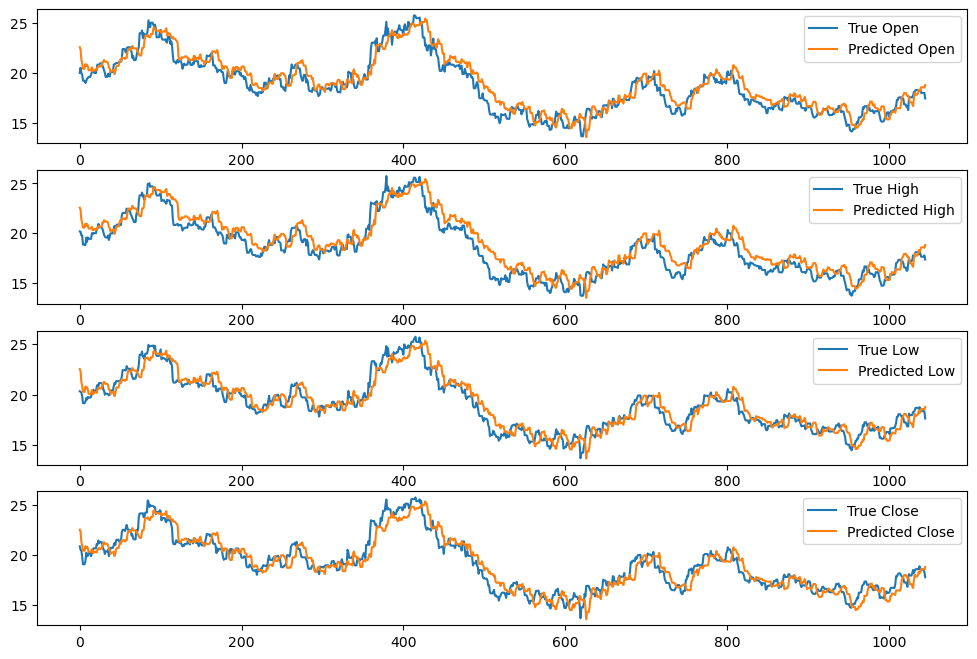

In [38]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i+1)
    plt.plot(y_true[:, i], label=f'True {feature}')
    plt.plot(y_pred[:, i], label=f'Predicted {feature}')
    plt.legend()
plt.show()

In [71]:
predicted_values = y_pred[400]
actual_values = y_true[400]

# Print them to compare
print(f"Predicted values for day {50}: {predicted_values}")
print(f"Actual values for day {50}: {actual_values}")

Predicted values for day 50: [23.827213 23.957638 23.6094   23.733984 24.198849 24.327105 23.984655
 24.107168 23.46553  23.600182 23.240652 23.369276 23.60604  23.74134
 23.380075 23.509321]
Actual values for day 50: [23.74     24.20464  23.96715  24.717861 24.113083 24.57     24.336458
 25.074688 23.375486 23.85519  23.61     24.38505  23.515562 23.997581
 23.751207 24.53    ]


In [73]:
predicted_values

array([23.827213, 23.957638, 23.6094  , 23.733984, 24.198849, 24.327105,
       23.984655, 24.107168, 23.46553 , 23.600182, 23.240652, 23.369276,
       23.60604 , 23.74134 , 23.380075, 23.509321], dtype=float32)

In [75]:
actual_values

array([23.74    , 24.20464 , 23.96715 , 24.717861, 24.113083, 24.57    ,
       24.336458, 25.074688, 23.375486, 23.85519 , 23.61    , 24.38505 ,
       23.515562, 23.997581, 23.751207, 24.53    ], dtype=float32)